# Scaling Exercises
***
Use the zillow dataset acquired and prepped in the previous lesson.    

Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.      
***
***
***
1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.
***
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
***
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
***
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
***
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [18]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from env import username, host, password 
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

from wrangle_zillow import wrangled_zillow

In [47]:
train, validate, test = wrangled_zillow()

Using cached CSV


In [48]:
train.head()
train.isnull().sum()
train.shape

(1198531, 9)

In [12]:
train.dtypes

beds          float64
baths         float64
area          float64
tax_value     float64
yearbuilt      object
tax_amount    float64
age            object
Orange          uint8
Ventura         uint8
dtype: object

In [14]:
features = [
    'beds', 'baths', 'area',
    'tax_value', 'Orange',
    'Ventura', 'tax_amount']

X_train, y_train = train[features], train['age']
X_validate, y_validate = validate[features], validate['age']
X_test, y_test = test[features], test['age']

#### 1.) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

<AxesSubplot:xlabel='tax_value', ylabel='Count'>

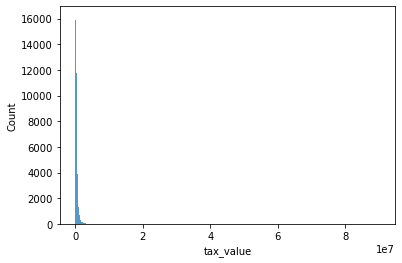

In [10]:
sns.histplot(data = train, x='tax_value')

Text(0.5, 1.0, 'Scaled')

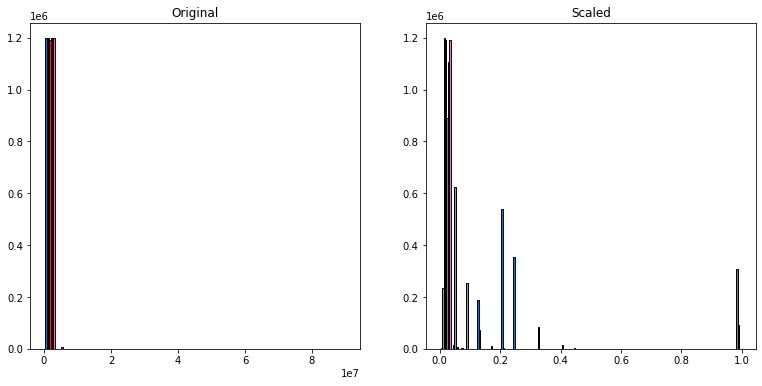

In [24]:
scaler = MinMaxScaler()
# .fit is called only with the training data in this instance,
# .transform will be for applying the scaling to all the data splits. 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Unscaled


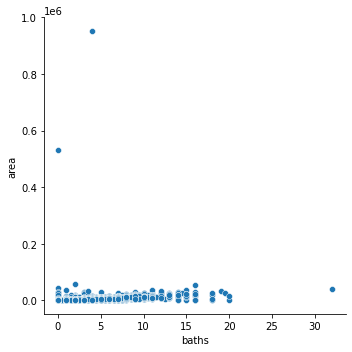

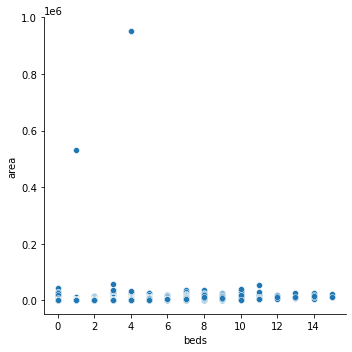

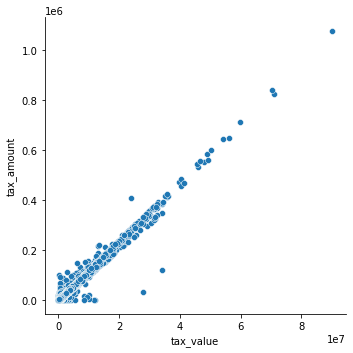

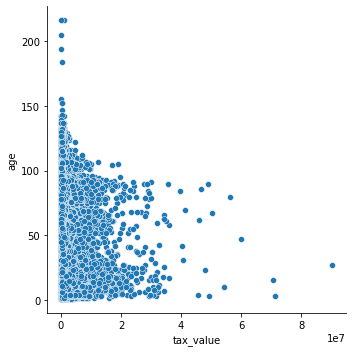

In [33]:
print('Unscaled')
sns.relplot(data = train, x = 'baths', y = 'area')
sns.relplot(data = train, x = 'beds', y = 'area')
sns.relplot(data = train, x = 'tax_value', y = 'tax_amount')
sns.relplot(data = train, x = 'tax_value', y = 'age')



In [50]:
train[['baths_scaled', 'beds_scaled', 'area_scaled']] = scaler.fit_transform(train[['baths', 'beds', 'area']])

In [51]:
train[['tax_value_scaled', 'tax_amount_scaled', 'age_scaled']] = scaler.fit_transform(train[['tax_value', 'tax_amount', 'age']])

Scaled
It looks essentially the same...


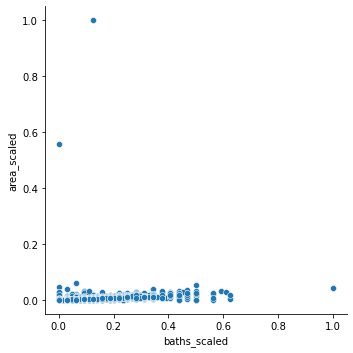

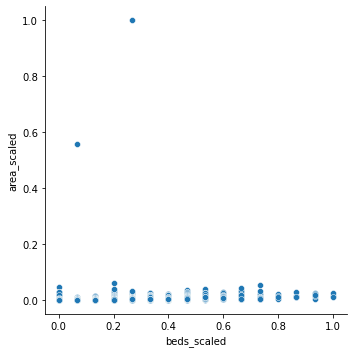

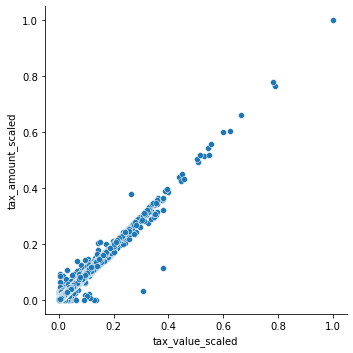

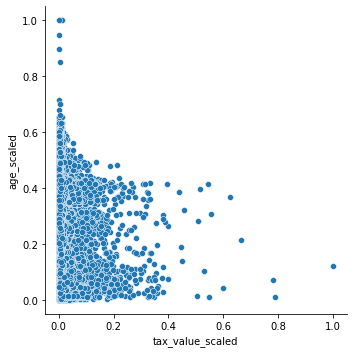

In [37]:
print('Scaled')
sns.relplot(data = train, x = 'baths_scaled', y = 'area_scaled')
sns.relplot(data = train, x = 'beds_scaled', y = 'area_scaled')
sns.relplot(data = train, x = 'tax_value_scaled', y = 'tax_amount_scaled')
sns.relplot(data = train, x = 'tax_value_scaled', y = 'age_scaled')
print('It looks essentially the same...')



#### 2.) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [56]:
#inv_trans_scaled_data = scaler.inverse_transform(train[['beds_scaled', 'baths_scaled', 'area_scaled', 'tax_amount_scaled', 'tax_value_scaled', 'age_scaled']])
#(inv_trans_scaled_data == train[['beds', 'baths', 'area', 'tax_amount', 'tax_value', 'age']]).mean()

In [57]:
inv_trans_scaled_data = scaler.inverse_transform(train[['baths_scaled', 'beds_scaled', 'area_scaled']])
(inv_trans_scaled_data == train[['baths', 'beds', 'area']]).mean()

baths    0.000000
beds     0.000000
area     0.000002
dtype: float64

In [54]:
inv_trans_scaled_data = scaler.inverse_transform(train[['tax_amount_scaled', 'tax_value_scaled', 'age_scaled']])
(inv_trans_scaled_data == train[['tax_amount', 'tax_value', 'age']]).mean()

tax_amount    0.000000
tax_value     0.000000
age           0.832267
dtype: float64

#### 3.) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [58]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(output_distribution = 'normal')
train[['baths_transformed', 'beds_transformed', 'area_transformed']] = quantile_trans.fit_transform(train[['baths', 'beds', 'area']])

In [60]:
train[['tax_amount_transformed', 'tax_value_transformed', 'age_transformed']]= quantile_trans.fit_transform(train[['tax_amount', 'tax_value', 'age']])

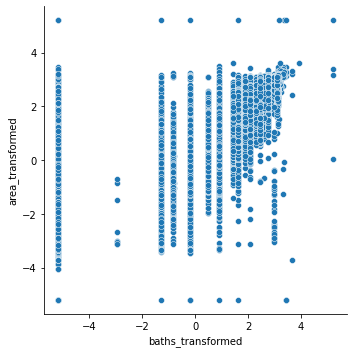

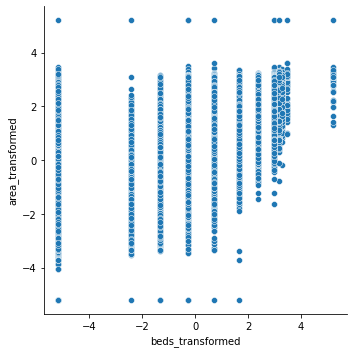

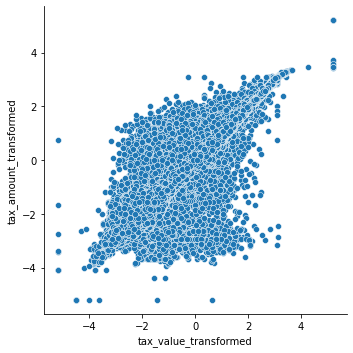

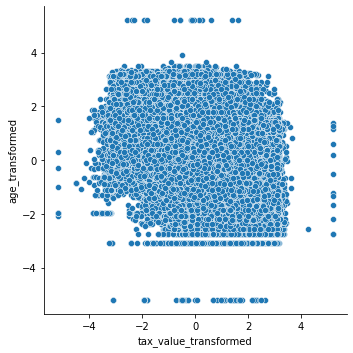

In [61]:
sns.relplot(data = train, x = 'baths_transformed', y = 'area_transformed')
sns.relplot(data = train, x = 'beds_transformed', y = 'area_transformed')
sns.relplot(data = train, x = 'tax_value_transformed', y = 'tax_amount_transformed')
sns.relplot(data = train, x = 'tax_value_transformed', y = 'age_transformed')

#### 4.) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [62]:
quantile_trans2 = QuantileTransformer()
train[['baths_transformed2', 'beds_transformed2', 'area_transformed2']] = quantile_trans2.fit_transform(train[['baths', 'beds', 'area']])
train[['tax_amount_transformed2', 'tax_value_transformed2', 'age_transformed2']]= quantile_trans2.fit_transform(train[['tax_amount', 'tax_value', 'age']])

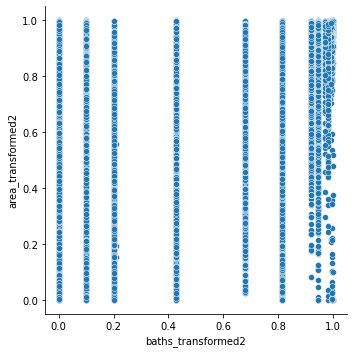

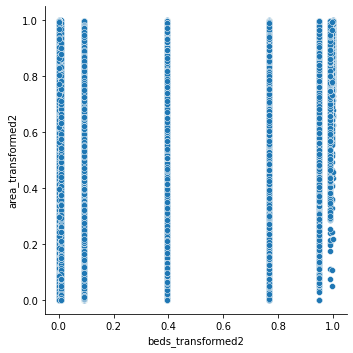

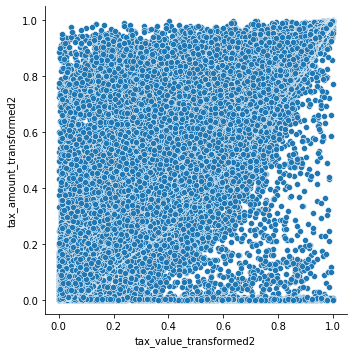

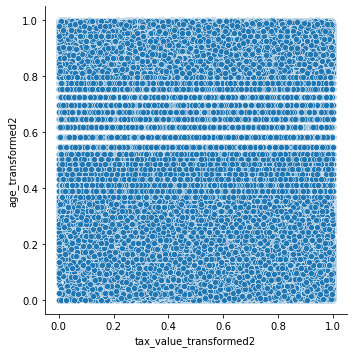

In [63]:
sns.relplot(data = train, x = 'baths_transformed2', y = 'area_transformed2')
sns.relplot(data = train, x = 'beds_transformed2', y = 'area_transformed2')
sns.relplot(data = train, x = 'tax_value_transformed2', y = 'tax_amount_transformed2')
sns.relplot(data = train, x = 'tax_value_transformed2', y = 'age_transformed2')

#### 5.) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scale_data(train, validate, test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    '''
    columns_to_scale = ['bedrooms', 'bathrooms', 'tax_value', 'taxamount', 'area', 'age']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

Notes during the lecture: 
